# Final Project: Predicting Hotel Reservation Cancellations

## Package Imports

In [110]:
import pandas as pd
import random
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
import graphviz
from sklearn.neighbors import KNeighborsClassifier

## Background

For this project, we are looking at hotel data that comes from an open hotel booking demand dataset in 2019. It contains information about the timing of the stay, how many people will be staying at the hotel, and how the stay was booked, among other factors contributing to the reservation. We will be looking at the is_canceled column as our target variable, predicting wether or not a stay is canceled based on the other data about the reservation.

## Exploratory Data Analysis/Data Cleaning

In [111]:
hotel_data = pd.read_csv("/Users/matthewsamuel/Library/CloudStorage/GoogleDrive-ms3wcw@virginia.edu/My Drive/Fall 2023/DS 3001/Final Project/hotels.csv")

In [112]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [113]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [114]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [115]:
# drop unnecessary variables
hotel_data = hotel_data.drop(['company'],axis=1)
hotel_data = hotel_data.dropna()

In [116]:
# create value counts for our potential predictors and one hot encode 
hotel_data['hotel'].value_counts(normalize=True)

hotel
City Hotel      0.69179
Resort Hotel    0.30821
Name: proportion, dtype: float64

In [117]:
hotel_data['arrival_date_month'].value_counts(normalize=True)

arrival_date_month
August       0.123156
July         0.112728
May          0.098033
June         0.095273
April        0.094719
October      0.091716
September    0.091463
March        0.079033
February     0.062637
December     0.054619
November     0.052442
January      0.044181
Name: proportion, dtype: float64

In [118]:
hotel_data.rename(columns={'arrival_date_month': 'arrival_season'}, inplace=True)
hotel_data['arrival_season'] = hotel_data['arrival_season'].apply(lambda x: "Winter" if x in ["December", "January", "February"] else "Spring" if x in ["March", "April", "May"] else "Summer" if x in ["June", "July", "August"] else "Fall")

In [119]:
hotel_data['meal'].value_counts(normalize=True)

meal
BB           0.754544
HB           0.130435
SC           0.100433
Undefined    0.008067
FB           0.006521
Name: proportion, dtype: float64

In [120]:
hotel_data['meal'] = hotel_data['meal'].apply(lambda x: x if x in ["BB", "HB"] else "Other")

In [121]:
hotel_data['country'].value_counts(normalize=True)

country
PRT    0.365337
GBR    0.105827
FRA    0.095341
ESP    0.076273
DEU    0.068012
         ...   
BHS    0.000010
UMI    0.000010
NPL    0.000010
MWI    0.000010
BFA    0.000010
Name: proportion, Length: 174, dtype: float64

In [122]:
hotel_data = hotel_data.drop(['country'],axis=1)

In [123]:
hotel_data['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.544803
Offline TA/TO    0.231053
Groups           0.152205
Direct           0.063969
Corporate        0.006725
Complementary    0.001001
Aviation         0.000243
Name: proportion, dtype: float64

In [124]:
hotel_data['market_segment'] = hotel_data['market_segment'].apply(lambda x: x if x in ["Online TA", "Offline TA/TO", "Groups", "Direct"] else "Other")

In [125]:
hotel_data['distribution_channel'].value_counts(normalize=True)

distribution_channel
TA/TO        0.919150
Direct       0.068060
Corporate    0.010934
GDS          0.001856
Name: proportion, dtype: float64

In [126]:
hotel_data['distribution_channel'] = hotel_data['distribution_channel'].apply(lambda x: x if x in ["TA/TO", "Direct"] else "Other")

In [127]:
hotel_data['reserved_room_type'].value_counts(normalize=True)

reserved_room_type
A    0.712043
D    0.170418
E    0.053035
F    0.024656
G    0.017581
B    0.009641
C    0.007435
H    0.005190
Name: proportion, dtype: float64

In [128]:
hotel_data['reserved_room_type'] = hotel_data['reserved_room_type'].apply(lambda x: x if x in ["A", "D"] else "Other")

In [129]:
hotel_data['assigned_room_type'].value_counts(normalize=True)

assigned_room_type
A    0.626878
D    0.213210
E    0.061286
F    0.030459
G    0.021080
B    0.018262
C    0.018155
H    0.005841
I    0.002663
K    0.002167
Name: proportion, dtype: float64

In [130]:
hotel_data['assigned_room_type'] = hotel_data['assigned_room_type'].apply(lambda x: x if x in ["A", "D"] else "Other")

In [131]:
hotel_data['deposit_type'].value_counts(normalize=True)

deposit_type
No Deposit    0.877835
Non Refund    0.121698
Refundable    0.000466
Name: proportion, dtype: float64

In [132]:
hotel_data['customer_type'].value_counts(normalize=True)

customer_type
Transient          0.755690
Transient-Party    0.200225
Contract           0.039487
Group              0.004597
Name: proportion, dtype: float64

In [133]:
hotel_data['reservation_status'].value_counts(normalize=True)

reservation_status
Check-Out    0.609686
Canceled     0.380566
No-Show      0.009748
Name: proportion, dtype: float64

In [134]:
# drop reservation_status and reservation_status_date
hotel_data = hotel_data.drop(['reservation_status'],axis=1)

In [135]:
hotel_data['reservation_status_date'].value_counts(normalize=True)

reservation_status_date
2015-10-21    0.013859
2015-07-06    0.007804
2015-01-01    0.007415
2016-01-18    0.005753
2016-11-25    0.005365
                ...   
2015-03-11    0.000010
2015-03-12    0.000010
2014-11-18    0.000010
2015-04-07    0.000010
2015-04-25    0.000010
Name: proportion, Length: 923, dtype: float64

In [136]:
hotel_data = hotel_data.drop(['reservation_status_date'], axis = 1) #everything except for 'is_canceled' column

In [137]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102894 entries, 3 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           102894 non-null  object 
 1   is_canceled                     102894 non-null  int64  
 2   lead_time                       102894 non-null  int64  
 3   arrival_date_year               102894 non-null  int64  
 4   arrival_season                  102894 non-null  object 
 5   arrival_date_week_number        102894 non-null  int64  
 6   arrival_date_day_of_month       102894 non-null  int64  
 7   stays_in_weekend_nights         102894 non-null  int64  
 8   stays_in_week_nights            102894 non-null  int64  
 9   adults                          102894 non-null  int64  
 10  children                        102894 non-null  float64
 11  babies                          102894 non-null  int64  
 12  meal                 

In [138]:
#Now we can move forward in normalizing the numeric values and create a index based on numeric columns:
abc = list(hotel_data.select_dtypes('number')) #select function to find the numeric variables and create a list  
hotel_data[abc] = MinMaxScaler().fit_transform(hotel_data[abc])

In [139]:
category_list = list(hotel_data.select_dtypes('object')) #select function to find the categorical variables and create a list  

hotel_data = pd.get_dummies(hotel_data, columns = category_list) 
#get_dummies encodes categorical variables into binary by adding in indicator column for each group of a category and assigning it 0 if false or 1 if true
hotel_data.info() #see the difference? This is one-hot encoding!

<class 'pandas.core.frame.DataFrame'>
Index: 102894 entries, 3 to 119389
Data columns (total 49 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     102894 non-null  float64
 1   lead_time                       102894 non-null  float64
 2   arrival_date_year               102894 non-null  float64
 3   arrival_date_week_number        102894 non-null  float64
 4   arrival_date_day_of_month       102894 non-null  float64
 5   stays_in_weekend_nights         102894 non-null  float64
 6   stays_in_week_nights            102894 non-null  float64
 7   adults                          102894 non-null  float64
 8   children                        102894 non-null  float64
 9   babies                          102894 non-null  float64
 10  is_repeated_guest               102894 non-null  float64
 11  previous_cancellations          102894 non-null  float64
 12  previous_bookings_not

In [140]:
print(hotel_data.is_canceled.value_counts(normalize=True))

is_canceled
0.0    0.609686
1.0    0.390314
Name: proportion, dtype: float64


Based on our exploratory data analysis, we would expect that the ‘deposit_type’ (no deposit, non-refundable, refundable), ‘previous_cancellations’ (whether or not the customer previously canceled a reservation), and ‘lead_time’ (the time between when the booking was entered into the reservation system and the arrival date) features would be important for our analysis since these would all likely have an impact on whether or not the customer ends up canceling their reservation.

We dropped the ‘company’ feature since it had over 110,000 missing/NA values. We dropped the ‘country’ feature since there were 174 unique values for it and also because we didn’t think it was going to be important to include in our model. Furthermore, we dropped the ‘reservation_status’ feature since it has the same prevalence as our target variable, which caused our model to have an accuracy of 1.0, and we dropped the ‘reservation_status_date’ features since there were 923 unique values for it. We also dropped all observations that contained any NA values in them. We collapsed the number of levels of certain categorical variables such as ‘arrival_date_month’ (which we renamed to be ‘arrival_season’ that has 4 levels – one for each season), as well as the ‘meal’, ‘market_segment’, ‘distribution_channel’, ‘reserved_room_type’, and ‘assigned_room_type’ features since these features have a lot of levels that have a very small value count. 

## Methods

In [141]:
#split independent and dependent variables 
X= hotel_data.drop(['is_canceled'], axis = 1) #everything except for 'is_canceled' column
y= hotel_data['is_canceled'] #only 'is_canceled' column

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, stratify= y, random_state=21)
X_tune, X_test, y_tune, y_test = train_test_split(X_test,y_test,  train_size = 0.50,stratify= y_test, random_state=49)

In [143]:
kf = RepeatedStratifiedKFold(n_splits=10,n_repeats =5, random_state=42)

In [144]:
print(metrics.get_scorer_names())

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

In [145]:
scoring = ['roc_auc','recall','balanced_accuracy']

In [146]:
param={"max_depth" : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
        #"splitter":["best","random"],
        #"min_samples_split":[5,10,15,20,25],
        #"min_samples_leaf":[5,10,15,20,25],
        #"min_weight_fraction_leaf":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
        #"max_features":["auto","log2","sqrt",None],
        #"max_leaf_nodes":[10,20,30,40,50],
        #'min_impurity_decrease':[0.00005,0.0001,0.0002,0.0005,0.001,0.0015,0.002,0.005,0.01],
        #'ccp_alpha' :[.001, .01, .1]
           }

In [147]:
#Classifier model we will use
cl= DecisionTreeClassifier(random_state=1000, max_leaf_nodes = 10)

In [148]:
#Set up search for best decisiontreeclassifier estimator across all of our folds based on roc_auc
search = GridSearchCV(cl, param, scoring=scoring, n_jobs=-1, cv=kf,refit='roc_auc')

In [149]:
model = search.fit(X_train, y_train)

In [150]:
best = model.best_estimator_
print(best)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=1000)


## Model Evaluation

In [151]:
print(model.cv_results_)

{'mean_fit_time': array([0.05734674, 0.07998535, 0.11057888, 0.13276705, 0.15578982,
       0.17141096, 0.17399065, 0.17792069, 0.17741371, 0.17499204,
       0.18126266, 0.19085783, 0.20047403, 0.18271464, 0.18075811,
       0.19437639, 0.18432129, 0.17771623, 0.19119477, 0.19469729]), 'std_fit_time': array([0.01531911, 0.00384162, 0.0081396 , 0.00610587, 0.00709092,
       0.00644363, 0.00936283, 0.00573917, 0.00536216, 0.00404491,
       0.00789785, 0.02378213, 0.02524382, 0.01028424, 0.00715409,
       0.02457061, 0.01242206, 0.0076793 , 0.02916713, 0.02702738]), 'mean_score_time': array([0.01599619, 0.01388336, 0.01478399, 0.01470863, 0.01420528,
       0.01411015, 0.01499   , 0.01509732, 0.01391691, 0.01426422,
       0.01651082, 0.01566364, 0.01625777, 0.01533296, 0.01500327,
       0.01640058, 0.01481112, 0.01482315, 0.0151255 , 0.01547983]), 'std_score_time': array([0.00692018, 0.00213022, 0.00282421, 0.00224777, 0.00198546,
       0.00180948, 0.00228547, 0.00237368, 0.0013744

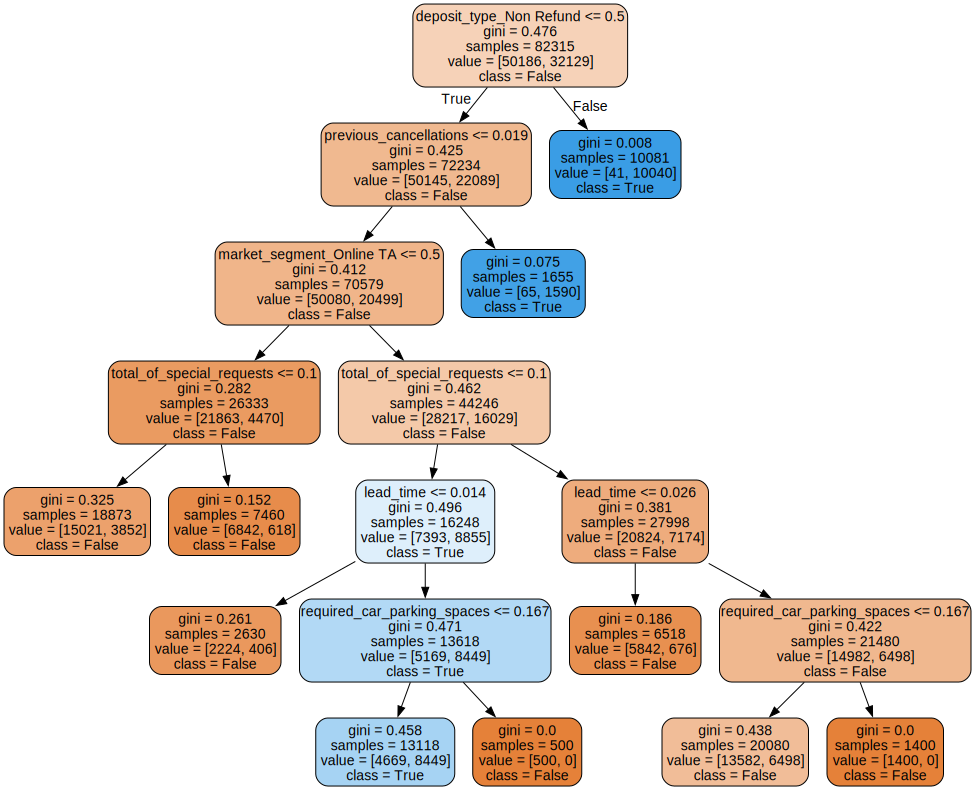

In [152]:
dot_data = export_graphviz(best, out_file =None,
               feature_names =X.columns, #feature names from dataset
               filled=True, 
                rounded=True,
                class_names = ['False', 'True']) #classification labels 
               
graph=graphviz.Source(dot_data)
graph 

In [153]:
graph.render("dt")

'dt.pdf'

In [154]:
print(model.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_roc_auc', 'split1_test_roc_auc', 'split2_test_roc_auc', 'split3_test_roc_auc', 'split4_test_roc_auc', 'split5_test_roc_auc', 'split6_test_roc_auc', 'split7_test_roc_auc', 'split8_test_roc_auc', 'split9_test_roc_auc', 'split10_test_roc_auc', 'split11_test_roc_auc', 'split12_test_roc_auc', 'split13_test_roc_auc', 'split14_test_roc_auc', 'split15_test_roc_auc', 'split16_test_roc_auc', 'split17_test_roc_auc', 'split18_test_roc_auc', 'split19_test_roc_auc', 'split20_test_roc_auc', 'split21_test_roc_auc', 'split22_test_roc_auc', 'split23_test_roc_auc', 'split24_test_roc_auc', 'split25_test_roc_auc', 'split26_test_roc_auc', 'split27_test_roc_auc', 'split28_test_roc_auc', 'split29_test_roc_auc', 'split30_test_roc_auc', 'split31_test_roc_auc', 'split32_test_roc_auc', 'split33_test_roc_auc', 'split34_test_roc_auc', 'split35_test_roc_auc', 'split36_test_roc_auc', 'split37_tes

In [155]:

auc = model.cv_results_['mean_test_roc_auc']
recall= model.cv_results_['mean_test_recall']
bal_acc= model.cv_results_['mean_test_balanced_accuracy']

SDauc = model.cv_results_['std_test_roc_auc']
SDrecall= model.cv_results_['std_test_recall']
SDbal_acc= model.cv_results_['std_test_balanced_accuracy']

#Parameter:
depth= np.unique(model.cv_results_['param_max_depth']).data

#Build DataFrame:
final_model = pd.DataFrame(list(zip(depth, auc, recall, bal_acc,SDauc,SDrecall,SDbal_acc)),
               columns =['depth','auc','recall','bal_acc','aucSD','recallSD','bal_accSD'])

print(final_model)

    depth       auc    recall   bal_acc     aucSD  recallSD  bal_accSD
0       1  0.655837  0.312490  0.655837  0.003927  0.007856   0.003927
1       2  0.680246  0.361978  0.679933  0.003730  0.007486   0.003723
2       3  0.750543  0.361387  0.680544  0.004091  0.007481   0.003725
3       4  0.796679  0.636995  0.744718  0.004012  0.007231   0.004277
4       5  0.827918  0.624887  0.760437  0.004115  0.007517   0.004019
5       6  0.836458  0.624949  0.764902  0.004042  0.007500   0.004038
6       7  0.831844  0.619129  0.768029  0.004146  0.007570   0.003842
7       8  0.831844  0.619129  0.768029  0.004146  0.007570   0.003842
8       9  0.831844  0.619129  0.768029  0.004146  0.007570   0.003842
9      10  0.831844  0.619129  0.768029  0.004146  0.007570   0.003842
10     11  0.831844  0.619129  0.768029  0.004146  0.007570   0.003842
11     12  0.831844  0.619129  0.768029  0.004146  0.007570   0.003842
12     13  0.831844  0.619129  0.768029  0.004146  0.007570   0.003842
13    

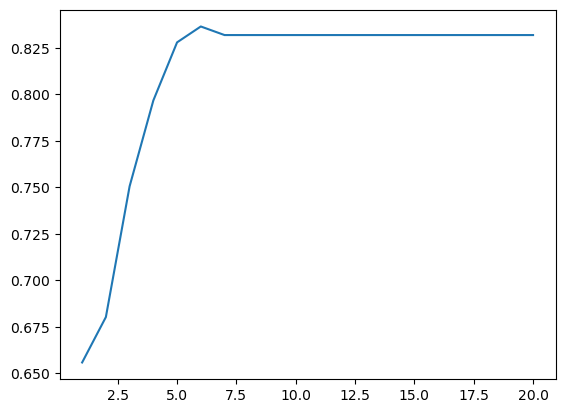

In [156]:
import matplotlib.pyplot as plt
print(plt.plot(final_model.depth,final_model.auc)) #5 does in fact have the highest (best) AUC!


In [157]:
varimp=pd.DataFrame(best.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance', ascending=False)
print(varimp)

                                importance
deposit_type_Non Refund           0.561716
total_of_special_requests         0.124769
previous_cancellations            0.096857
lead_time                         0.090178
market_segment_Online TA          0.081571
required_car_parking_spaces       0.044908
reserved_room_type_A              0.000000
market_segment_Groups             0.000000
market_segment_Offline TA/TO      0.000000
market_segment_Other              0.000000
distribution_channel_Direct       0.000000
distribution_channel_Other        0.000000
distribution_channel_TA/TO        0.000000
reserved_room_type_Other          0.000000
reserved_room_type_D              0.000000
meal_Other                        0.000000
assigned_room_type_A              0.000000
assigned_room_type_D              0.000000
assigned_room_type_Other          0.000000
deposit_type_No Deposit           0.000000
deposit_type_Refundable           0.000000
customer_type_Contract            0.000000
customer_ty

Axes(0.125,0.11;0.775x0.77)


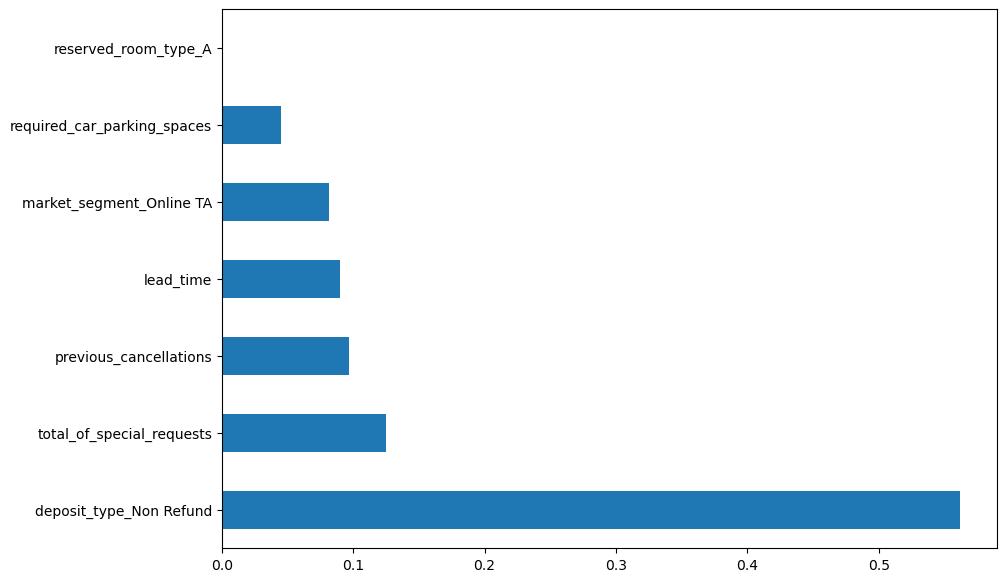

In [158]:
plt.figure(figsize=(10,7))
print(varimp.importance.nlargest(7).plot(kind='barh'))

In [159]:
pred_ratings_test_set = model.predict(X_test)
print(pred_ratings_test_set)

[1. 1. 1. ... 1. 0. 0.]


In [160]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,pred_ratings_test_set).ravel()

In [161]:
print("True Error Rate = "+ str((fp+fn)/len(y_test)*100))

True Error Rate = 21.205053449951407


In [162]:
print("Detection Rate = " +str((tp)/len(y_test)*100))

Detection Rate = 24.02332361516035


Text(0.5, 0, 'False Positive Rate')

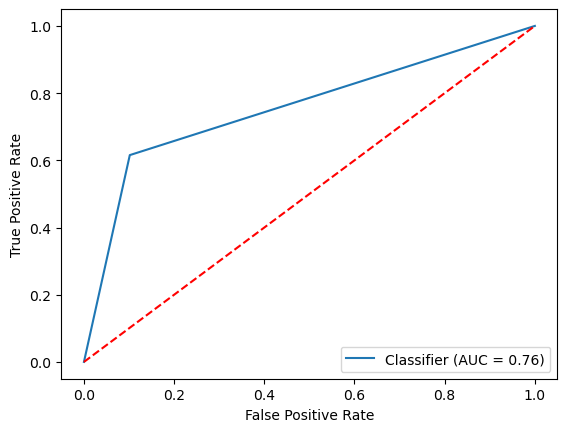

In [163]:
# visualizing the ROC curve
metrics.RocCurveDisplay.from_predictions(y_test,pred_ratings_test_set)
#Set labels and midline...
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

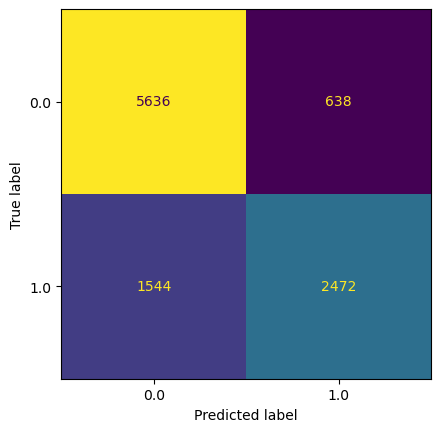

In [164]:
# visualizing the confusion matrix
print(ConfusionMatrixDisplay.from_estimator(best,X_test,y_test, colorbar=False))

In [165]:
# sorting the variables by importance in predicting reservation status
varimp_test_set =pd.DataFrame(best.feature_importances_,index = X_test.columns,columns=['importance']).sort_values('importance', ascending=False)
print(varimp_test_set)

                                importance
deposit_type_Non Refund           0.561716
total_of_special_requests         0.124769
previous_cancellations            0.096857
lead_time                         0.090178
market_segment_Online TA          0.081571
required_car_parking_spaces       0.044908
reserved_room_type_A              0.000000
market_segment_Groups             0.000000
market_segment_Offline TA/TO      0.000000
market_segment_Other              0.000000
distribution_channel_Direct       0.000000
distribution_channel_Other        0.000000
distribution_channel_TA/TO        0.000000
reserved_room_type_Other          0.000000
reserved_room_type_D              0.000000
meal_Other                        0.000000
assigned_room_type_A              0.000000
assigned_room_type_D              0.000000
assigned_room_type_Other          0.000000
deposit_type_No Deposit           0.000000
deposit_type_Refundable           0.000000
customer_type_Contract            0.000000
customer_ty

In [166]:
print(best.score(X_test,y_test)) #Pretty precise, nice!

0.787949465500486


In [167]:
print(best.score(X_tune,y_tune)) #same with tuning set

0.7967732529886287


# Fairness Assessment
This data did not deal with any protected classes, so we did not have to account for them when making our model and evaluation.

# Conclusion

## Analysis of Confusion Matrix and ROC curve

Overall Accuracy: 0.7821

Sensitivity (Recall): 0.6155

Specificity: 0.8983

Precision: 0.7949

False Positive Rate (FPR): 0.1017

False Negative Rate (FNR): 0.3845

Our analysis and values that we got based on our confusion matrix, our overall accuracy is 78.21%, which means that 78.21% of our data will be accurately predicted by our model. A sensitivity of 0.6155 means that 61.55% of reservations that are predicted as being cancelled are actually cancelled. A specificity of 0.8983 implies that 89.83% of reservations that are predicted as not being cancelled are actually not cancelled. Finally, a precision of 0.7949 means that out of all of the observations who are predicted to cancel, 79.49% of them actually cancel.

Our false negative and false positive rates are pretty low, which indicates that our model is pretty good at predicting whether or not a reservation is going to be cancelled or not. 

ROC Curve: Since our ROC curve appears to be above the AUC curve, this shows that the model we created for predicting whether or not a reservation will be canceled or not is better at predicting than just guessing at random. Additionally, because our ROC curve has a sharp angle instead of a smooth curve, this shows that our model is close to being perfect. While this may seem jarring and could imply a scarcity of points, our model contains close to 103,000 observations. This is a significantly large number of points used to predict our model. However, our ROC curve show cases the performance with our test set, which in this case would not imply overfitting being an issue. 

### Analysis of  Decision Tree

The decision tree indicates the variable previous cancellations is the most important. If a customer has previously cancelled a reservation, they are more likely to cancel the current reservation. The next most significant variable is market_segment_Online TA (if the booking was made a travel agent). If the booking was made by a travel agent, the booking is more likely to be cancelled. Other relevant variables include total number of speical requests, lead time (Number of days that elapsed between the entering date of the booking into the PMS and the arrival date), and the number of required parking spaces. 


## Future Work

Limitations
- Prevalence = 0.39
    - A prevalence of 0.39 indicates a somewhat imbalanced dataset. The model may have a tendency to favor the majority class (reservatinos that were not cancelled)


- Explore the shape of the ROC curve

- Adjust the threshold
    - If the stakeholder cares more about the model missing cancelled reservations (care more about FNR) we would lower the threshold to make the classifier more sensitve.
    - If the stakeholder cares more about the model falsely predicting a cancellation (care more about FPR), we would increase the threshold to mkae the classifier less senstive.


- Explore other methods: KNN, Random Forests, Clustering

[Github link](https://github.com/treypallace/DS3001-Final)